# Predicting the Sale Price of Bulldozers using Machine Learning 


## Data Loading & Initial Exploration 

In [1372]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

In [1373]:
train = pd.read_csv('C:/Users/hp/Desktop/ML/Deepflow Project/Current data/Train.csv', low_memory=False, parse_dates=['saledate'])

When handling time series data, it’s important to extract as much information as possible from the time and date features. In our case, we work with the saledate column, converting it to datetime format and then deriving useful features like saleYear, saleMonth, saleDay, saleDayOfWeek, and saleDayOfYear. These enriched features help the model capture temporal patterns more effectively.

In [1374]:
print(train.dtypes['saledate'])

object


In [1375]:
train['saledate'] = pd.to_datetime(train['saledate'], format='mixed', dayfirst=True)

In [1376]:
print(train.dtypes['saledate'])

datetime64[ns]


In [1377]:
train.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1378]:
train.isnull().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    258360
UsageBand                   331486
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             137191
fiModelSeries               344217
fiModelDescriptor           329206
ProductSize                 210775
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                296764
Enclosure                      325
Forks                       209048
Pad_Type                    321991
Ride_Control                252519
Stick                       321991
Transmission                217895
Turbocharged                321991
Blade_Extension     

## Cleaning the Data in Preparation for Data Modelling


In [1379]:
# Identify and drop columns with >90% missing values
high_missing_cols = [col for col in train.columns if train[col].isnull().mean() > 0.90]
train.drop(high_missing_cols, axis=1, inplace=True)

In [1380]:
train.drop(["SalesID", "MachineID"], axis=1, inplace=True)

In [1381]:
train.dtypes.value_counts()

object            37
int64              4
float64            2
datetime64[ns]     1
Name: count, dtype: int64

In [1382]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 44 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalePrice                 401125 non-null  int64         
 1   ModelID                   401125 non-null  int64         
 2   datasource                401125 non-null  int64         
 3   auctioneerID              380989 non-null  float64       
 4   YearMade                  401125 non-null  int64         
 5   MachineHoursCurrentMeter  142765 non-null  float64       
 6   UsageBand                 69639 non-null   object        
 7   saledate                  401125 non-null  datetime64[ns]
 8   fiModelDesc               401125 non-null  object        
 9   fiBaseModel               401125 non-null  object        
 10  fiSecondaryDesc           263934 non-null  object        
 11  fiModelSeries             56908 non-null   object        
 12  fi

In [1383]:
train.head().T

,0,1,2,3,4
SalePrice,66000,57000,10000,38500,11000
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00
fiModelDesc,521D,950FII,226,PC120-6E,S175
fiBaseModel,521,950,226,PC120,S175


In [1384]:
# Sort DataFrame in date order
train.sort_values(by=["saledate"], inplace=True, ascending=True)
train.saledate.head()

227861   1989-01-02
100964   1989-01-02
170025   1989-01-02
170009   1989-01-02
30354    1989-01-02
Name: saledate, dtype: datetime64[ns]

In [1385]:
# Add datetime parameters for saledate column
train["saleYear"] = train['saledate'].dt.year
train["saleMonth"] = train['saledate'].dt.month
train["saleDay"] = train['saledate'].dt.day
train["saleDayOfWeek"] = train['saledate'].dt.dayofweek
train["saleDayOfYear"] = train['saledate'].dt.dayofyear

In [1386]:
train.head()

,SalePrice,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
227861,36000,8899,132,4.0,1982,NaN,NaN,1989-01-02,K909,K909,...,NaN,NaN,NaN,NaN,NaN,1989,1,2,0,2
100964,23000,7261,132,4.0,1978,NaN,NaN,1989-01-02,920,920,...,NaN,NaN,NaN,Standard,Conventional,1989,1,2,0,2
170025,18500,8247,132,4.0,1979,NaN,NaN,1989-01-02,644,644,...,NaN,NaN,NaN,Standard,Conventional,1989,1,2,0,2
170009,20000,8247,132,4.0,1979,NaN,NaN,1989-01-02,644,644,...,NaN,NaN,NaN,Standard,Conventional,1989,1,2,0,2
30354,22000,6788,132,4.0,1983,NaN,NaN,1989-01-02,580,580,...,NaN,NaN,NaN,NaN,NaN,1989,1,2,0,2


In [1387]:
train["saleYear"] = train.saledate.dt.year

In [1388]:
print("saledate" in train.columns)

True


In [1389]:
#After extracting useful datetime features, we remove the original 'saledate' column as it's no longer needed
train.drop("saledate", axis=1, inplace=True, errors='ignore')

In [1390]:
print("saledate" in train.columns)

False


#### Make a copy of sorted and parsed dates DataFrame

In [1391]:
train_1=train.copy()
train_1.to_csv('C:/Users/hp/Desktop/ML/Deepflow Project/Current data/train_1.csv', index=False)

#### List of all columns with missing data

In [1392]:
train_1.columns[train_1.isnull().any()].tolist()

['auctioneerID',
 'MachineHoursCurrentMeter',
 'UsageBand',
 'fiSecondaryDesc',
 'fiModelSeries',
 'fiModelDescriptor',
 'ProductSize',
 'Drive_System',
 'Enclosure',
 'Forks',
 'Pad_Type',
 'Ride_Control',
 'Stick',
 'Transmission',
 'Turbocharged',
 'Hydraulics',
 'Ripper',
 'Tire_Size',
 'Coupler',
 'Coupler_System',
 'Grouser_Tracks',
 'Hydraulics_Flow',
 'Track_Type',
 'Undercarriage_Pad_Width',
 'Stick_Length',
 'Thumb',
 'Pattern_Changer',
 'Grouser_Type',
 'Backhoe_Mounting',
 'Blade_Type',
 'Travel_Controls',
 'Differential_Type',
 'Steering_Controls']

In [1393]:
# Check for missing values in train_1
train_1.isna().sum()[train_1.isna().sum()>0].sort_values(ascending=False)

Grouser_Tracks              357763
Hydraulics_Flow             357763
Coupler_System              357667
fiModelSeries               344217
Steering_Controls           331756
Differential_Type           331714
UsageBand                   331486
fiModelDescriptor           329206
Backhoe_Mounting            322453
Stick                       321991
Turbocharged                321991
Pad_Type                    321991
Blade_Type                  321292
Travel_Controls             321291
Tire_Size                   306407
Grouser_Type                301972
Track_Type                  301972
Pattern_Changer             301907
Stick_Length                301907
Thumb                       301837
Undercarriage_Pad_Width     301253
Ripper                      296988
Drive_System                296764
MachineHoursCurrentMeter    258360
Ride_Control                252519
Transmission                217895
ProductSize                 210775
Forks                       209048
Coupler             

### Handling Missing Values in String Columns (Categorical)

#### Check which columns contain strings

In [1394]:
string_col=train_1.select_dtypes(include=['object', 'string']).columns.tolist()
print(string_col)

['UsageBand', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries', 'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission', 'Turbocharged', 'Hydraulics', 'Ripper', 'Tire_Size', 'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls', 'Differential_Type', 'Steering_Controls']


#### Convert the list of string values into categorical (numerical) 

In [1395]:
# This will turn all of the string values into category values
for col in string_col:
    train_1[col] = train_1[col].astype("category").cat.as_ordered()

In [1396]:
# Get the encoded integer codes for the 'UsageBand' categorical column.Similarly get the encoded integer codes for the 'state' categorical column
train_1.UsageBand.cat.codes, train_1.state.cat.codes

(227861   -1
 100964   -1
 170025   -1
 170009   -1
 30354    -1
          ..
 396548   -1
 400447   -1
 397987   -1
 400455   -1
 400393   -1
 Length: 401125, dtype: int8,
 227861     8
 100964     8
 170025     8
 170009     8
 30354      8
           ..
 396548    31
 400447    31
 397987    31
 400455    31
 400393    31
 Length: 401125, dtype: int8)

In [1397]:
# All missing data in terms of percentages
train_1.isnull().sum()/len(train_1)

SalePrice                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.050199
YearMade                    0.000000
MachineHoursCurrentMeter    0.644089
UsageBand                   0.826391
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.342016
fiModelSeries               0.858129
fiModelDescriptor           0.820707
ProductSize                 0.525460
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.739829
Enclosure                   0.000810
Forks                       0.521154
Pad_Type                    0.802720
Ride_Control                0.629527
Stick                       0.802720
Transmission                0.543210
Turbocharged                0.802720
Hydraulics                  0.200823
Ripper                      0.740388
T

In [1398]:
# Handle string columns in train_1
for label, content in train_1.items():
    if pd.api.types.is_string_dtype(content):
        # Optional: Track where the missing values were originally
        train_1[label + "_is_missing"] = content.isnull()
        # Convert to categorical and encode; missing values (-1) become 0 after +1
        train_1[label] = pd.Categorical(content).codes + 1

In [1399]:
train_1.head().T

,227861,100964,170025,170009,30354
SalePrice,36000,23000,18500,20000,22000
ModelID,8899,7261,8247,8247,6788
datasource,132,132,132,132,132
auctioneerID,4.0,4.0,4.0,4.0,4.0
YearMade,1982,1978,1979,1979,1983
...,...,...,...,...,...
Backhoe_Mounting_is_missing,True,True,True,True,True
Blade_Type_is_missing,True,True,True,True,True
Travel_Controls_is_missing,True,True,True,True,True
Differential_Type_is_missing,True,False,False,False,True


In [1400]:
train_1.isnull().sum()/len(train_1)

SalePrice                       0.000000
ModelID                         0.000000
datasource                      0.000000
auctioneerID                    0.050199
YearMade                        0.000000
                                  ...   
Backhoe_Mounting_is_missing     0.000000
Blade_Type_is_missing           0.000000
Travel_Controls_is_missing      0.000000
Differential_Type_is_missing    0.000000
Steering_Controls_is_missing    0.000000
Length: 85, dtype: float64

In [1401]:
train_2 = train_1.copy()
train_2.to_csv('C:/Users/hp/Desktop/ML/Deepflow Project/Current data/train_2.csv')

### Handling Missing Values in Numerical Columns 

#### Check for which numeric columns have null values 

In [1402]:
# List of numerical columns 
numeric_cols = train_1.select_dtypes(include=['int', 'float']).columns.tolist()

In [1403]:
print(numeric_cols)

['SalePrice', 'ModelID', 'datasource', 'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'saleYear', 'saleMonth', 'saleDay', 'saleDayOfWeek', 'saleDayOfYear']


In [1404]:
# Check for which numeric columns have null values
numeric_na_cols=[col for col in train_1.select_dtypes(include=['int', 'float']).columns 
                   if train_1[col].isnull().any()]
print(numeric_na_cols)

['auctioneerID', 'MachineHoursCurrentMeter']


#### Fill missing numeric values with median 

In [1405]:
# Handle missing numeric values in train_2
for label, content in train_2.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column to indicate missing values
            train_2[label + "_is_missing"] = pd.isnull(content)
            # Fill missing values with median
            train_2[label] = content.fillna(content.median())

In [1406]:
train_2.isna().sum()

SalePrice                              0
ModelID                                0
datasource                             0
auctioneerID                           0
YearMade                               0
                                      ..
Travel_Controls_is_missing             0
Differential_Type_is_missing           0
Steering_Controls_is_missing           0
auctioneerID_is_missing                0
MachineHoursCurrentMeter_is_missing    0
Length: 87, dtype: int64

 #### Copy of data following data preparation and prior to data modelling stage.

In [1407]:
train_3 = train_2.copy()
train_3.to_csv('C:/Users/hp/Desktop/ML/Deepflow Project/Current data/train_3.csv') 

## Upload TrainandValid and valid Dataset

In [1408]:
tv = pd.read_csv('C:/Users/hp/Desktop/ML/Deepflow Project/Current data/TrainAndValid.csv'
, parse_dates=["saledate"], low_memory=False)


In [1409]:
valid = pd.read_csv('C:/Users/hp/Desktop/ML/Deepflow Project/Current data/Valid.csv'
, parse_dates=["saledate"], low_memory=False)


### preprocess() Function

In [1410]:
import pandas as pd
import numpy as np

def preprocess(df):
    # 1. Convert saledate to datetime
    df['saledate'] = pd.to_datetime(df['saledate'], format='mixed', dayfirst=True)

    # 2. Extract date-related features
    df["saleYear"] = df['saledate'].dt.year
    df["saleMonth"] = df['saledate'].dt.month
    df["saleDay"] = df['saledate'].dt.day
    df["saleDayOfWeek"] = df['saledate'].dt.dayofweek
    df["saleDayOfYear"] = df['saledate'].dt.dayofyear

    # 3. Derived feature: machine age
    df['machine_age'] = df['saleYear'] - df['YearMade']

    # 4. Drop 'saledate' column
    df.drop(columns='saledate', inplace=True)

    # 5. Drop ID columns (if present)
    for id_col in ['SalesID', 'MachineID']:
        if id_col in df.columns:
            df.drop(id_col, axis=1, inplace=True)

    # 6. Drop columns with >90% missing values
    missing_ratio = df.isnull().mean()
    high_missing = missing_ratio[missing_ratio > 0.9].index
    print("Dropping highly missing columns:", high_missing.tolist())
    df.drop(high_missing, axis=1, inplace=True)

    # 7. Handle categorical columns (convert to ordered categories)
    string_cols = df.select_dtypes(include=['object', 'string']).columns.tolist()
    for col in string_cols:
        df[col] = df[col].astype("category").cat.as_ordered()

    # 8. Encode categorical variables and add _is_missing column
    for label, content in df.items():
        if pd.api.types.is_string_dtype(content) or isinstance(content.dtype, pd.CategoricalDtype):
            df[label + "_is_missing"] = pd.isnull(content)
            df[label] = pd.Categorical(content).codes + 1

    # 9. Handle numeric columns with missing values
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label + "_is_missing"] = pd.isnull(content)
                df[label] = content.fillna(content.median())

    return df


## Model Training

### 1.Linear Regression

In [1411]:
tv = preprocess(tv)
valid = preprocess(valid)

Dropping highly missing columns: ['Blade_Extension', 'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Pushblock', 'Scarifier', 'Tip_Control']
Dropping highly missing columns: ['Blade_Extension', 'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Pushblock', 'Scarifier', 'Tip_Control']


In [1412]:
tv.isna().sum()

SalePrice                              0
ModelID                                0
datasource                             0
auctioneerID                           0
YearMade                               0
                                      ..
Travel_Controls_is_missing             0
Differential_Type_is_missing           0
Steering_Controls_is_missing           0
auctioneerID_is_missing                0
MachineHoursCurrentMeter_is_missing    0
Length: 88, dtype: int64

In [1413]:
from sklearn.model_selection import train_test_split
# Split data into training and validation
# Split based on the year
df_val = tv[tv.saleYear == 2012]         # All data from 2012 → for validation
df_train = tv[tv.saleYear != 2012]       # All other years → for training
 
# Split into features (X) and labels (y)
X_train, y_train = df_train.drop("SalePrice", axis=1), df_train.SalePrice
X_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val.SalePrice

In [1414]:
y_valid.isna().sum()

0

In [1415]:
y_train.isna().sum()

0

In [1416]:
# Create the model
lin_reg = LinearRegression()

# Fit the model
lin_reg.fit(X_train, y_train)

# Predict
y_preds = lin_reg.predict(X_valid)

In [1417]:
np.isnan(y_preds).sum()

0

### Calculating RMSLE as an Evaluation Function

#### Clip the negative predictions to 0 before calculating RMSLE 

In [1418]:
print("NaNs in predictions:", np.isnan(y_preds).sum())
print("Negatives in predictions:", (y_preds < 0).sum())
print("Min value in predictions:", y_preds.min())

NaNs in predictions: 0
Negatives in predictions: 116
Min value in predictions: -11002.421245754347


In [1419]:
from sklearn.metrics import mean_squared_error

# Define RMSLE function
def rmsle(y_true, y_preds):
    # Clip negative predictions to 0
    y_preds = np.maximum(0, y_preds)
    return np.sqrt(mean_squared_error(np.log1p(y_true), np.log1p(y_preds)))

# Now compute score
rmsle_score = rmsle(y_valid, y_preds)
print(f"RMSLE: {rmsle_score:.4f}")

RMSLE: 1.0872


In [1420]:
%%time
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error, r2_score, mean_absolute_error
import numpy as np

# Step 1: Instantiate the model
model = RandomForestRegressor(
    n_jobs=-1,       # Use all processors
    max_samples=10000,  # Subsample size (for faster training)
    random_state=42
)
# Step 2: Fit the model
model.fit(X_train, y_train)

CPU times: total: 1min 11s
Wall time: 10.4 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [1421]:
# Step 3: RMSLE Function
def rmsle(y_true, y_preds):
    """
    Calculates Root Mean Squared Logarithmic Error (RMSLE)
    """
    return np.sqrt(mean_squared_log_error(y_true, y_preds))
    
# Step 4: Simplified Evaluation Function (RMSLE only)
def show_rmsle_scores(model):
    """
    Evaluate model using RMSLE on training and validation sets only.
    """
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)

    scores = {
        "Training RMSLE": round(rmsle(y_train, train_preds), 5),
        "Validation RMSLE": round(rmsle(y_valid, val_preds), 5)
    }
    return scores

# Step 5: Show only RMSLE scores
show_rmsle_scores(model)


{'Training RMSLE': 0.25307, 'Validation RMSLE': 0.28722}

# Make Predictions on Test Data


In [1422]:
# STEP 1: Load and preprocess test data
test_df_raw = pd.read_csv('C:/Users/hp/Desktop/ML/Deepflow Project/Current data/Test.csv'
, low_memory=False)

# Save SalesID for later (as we dropped it during training)
test_ids = test_df_raw["SalesID"]
# Preprocess test data using the same function as training
test_df = preprocess(test_df_raw.copy())
test_ids = test_df_raw["SalesID"].copy()

Dropping highly missing columns: ['Blade_Extension', 'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Pushblock', 'Scarifier', 'Tip_Control']


In [1423]:
# STEP 2: Ensure the test data has the same columns as training
# This is important because some columns may have been added during preprocessing (e.g., *_is_missing)
missing_cols = set(X_train.columns) - set(test_df.columns)
for col in missing_cols:
    test_df[col] = 0

# Also make sure column order matches
test_df = test_df[X_train.columns]

In [1424]:
# STEP 3: Make predictions using your trained model
test_preds = model.predict(test_df)

In [1425]:
# STEP 4: Create a submission DataFrame
submission_df = pd.DataFrame({
    "SalesID": test_ids,
    "SalePrice": test_preds
})

In [1426]:
# STEP 5: Save to CSV
submission_df.to_csv("test_predictions.csv", index=False)
print(" Submission file saved as test_predictions.csv")

 Submission file saved as test_predictions.csv


In [1427]:
# Basic info
print(test_df.info())
# Summary statistics
print(test_df.describe())
# Check for missing values
print(test_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 87 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ModelID                              12457 non-null  int64  
 1   datasource                           12457 non-null  int64  
 2   auctioneerID                         12457 non-null  int64  
 3   YearMade                             12457 non-null  int64  
 4   MachineHoursCurrentMeter             12457 non-null  float64
 5   UsageBand                            12457 non-null  int8   
 6   fiModelDesc                          12457 non-null  int16  
 7   fiBaseModel                          12457 non-null  int16  
 8   fiSecondaryDesc                      12457 non-null  int8   
 9   fiModelSeries                        12457 non-null  int8   
 10  fiModelDescriptor                    12457 non-null  int8   
 11  ProductSize                 

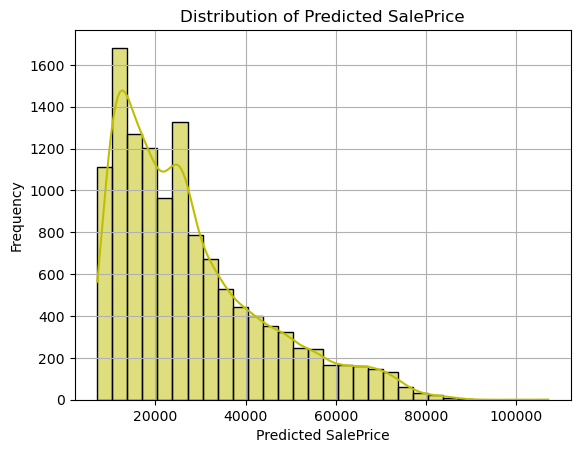

In [1428]:
sns.histplot(test_preds, kde=True, color="y", bins=30)
plt.title("Distribution of Predicted SalePrice")
plt.xlabel("Predicted SalePrice")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

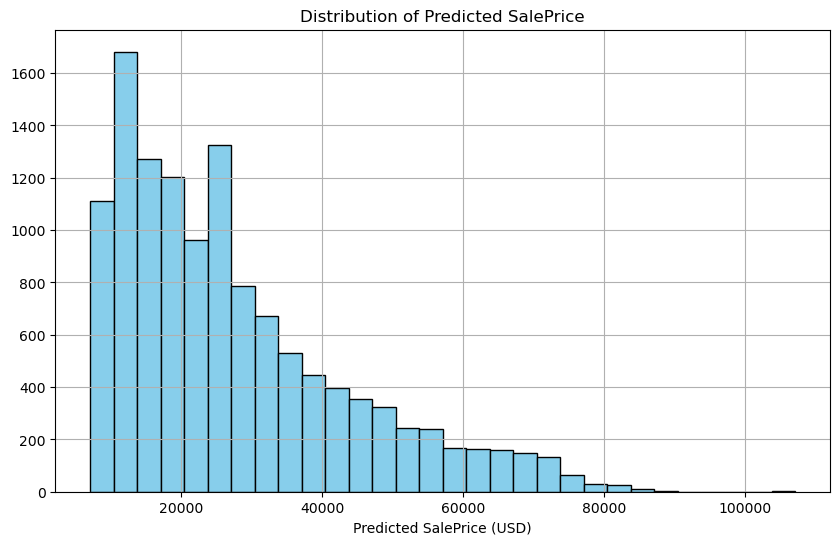

In [1429]:
plt.figure(figsize=(10, 6))
plt.hist(test_preds, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Predicted SalePrice (USD)')
plt.title('Distribution of Predicted SalePrice')
plt.grid(True)
plt.show()